## Exercise 1 - Gauss-Newton Method

---

```python
Auther = 'Yubo Cai'
Email = 'yubo.cai@polytechnique.edu'
```

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 1**

Observe the notebook concerning the Gauss-Newton Method shown in the course and test it for the non-linear least square functions proposed below. In each case test the behavior of the algorithm for different initializations.

- Rosenbrock (already implemented)
  $$
  f(x, y)=100\left(y-x^{2}\right)^{2}+(1-x)^{2}
  $$
  with a global minimum at $f(1,1)=0$.

-  Beale function defined on $[-4.5,4.5]^{2}$ by
    $$
    f(x, y)=(1.5-x+x y)^{2}+\left(2.25-x+x y^{2}\right)^{2}+\left(2.625-x+x y^{3}\right)^{2}
    $$
    with a global minimum at $f(3,0.5)=0$.

For all the subsequent questions use the Gauss-Newton implementation to solve the non linear least-squares problem involved.
</div>


Initial value: 543.0746246400004


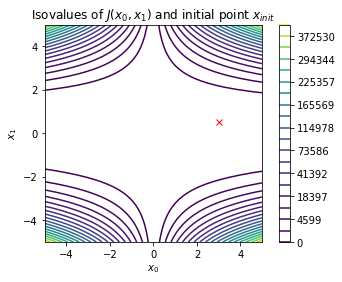

[209.3885112 502.3201568]


In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import csv
import pandas as pd

data = np.genfromtxt('WorldPopulation.csv', delimiter=',', names=True)
T = data['Year']  # for the time series
T = (T - T[-1]) / (T[0] - T[-1])  # normalize the time series
Pop = data['Population'] / 1e9  # for the population in billions
N = len(T)  # number of data points

x0 = np.array([2.2, 2.1])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 5e-16
Maxiter = 2000

variant = 2

if variant == 5:
    x0 = np.array([2.2, 2.1, 2.0])

# least squares functions r_i


def r(x):
    if variant == 1:
        return np.array([10 * (x[1] - x[0]**2), 1 - x[0]])
    if variant == 2:
        return np.array([
            1.5 - x[0] + x[0] * x[1], 2.25 - x[0] + x[0] * x[1]**2,
            2.625 - x[0] + x[0] * x[1]**3
        ])
    if variant == 3:
        xa, ya = A
        xb, yb = B
        xc, yc = C
        return np.array([
            dA - np.sqrt((x[0] - xa)**2 + (x[1] - ya)**2),
            dB - np.sqrt((x[0] - xb)**2 + (x[1] - yb)**2),
            dC - np.sqrt((x[0] - xc)**2 + (x[1] - yc)**2)
        ])
    if variant == 4:
        return np.array(
            [Pop[i] - x[0] * np.exp(x[1] * T[i]) for i in range(0, N)])
    if variant == 5:
        return np.array([
            Pop[i] - x[0] / (1 + x[1] * np.exp(-x[2] * T[i]))
            for i in range(0, N)
        ])


# compute Jacobian matrix: on each line the partial derivatives w.r.t one of the variables
def Jac(x):
    if variant == 1:
        return np.array([[-20 * x[0], 10], [-1, 0]])
    if variant == 2:
        return np.array([[-1 + x[1], x[0]], [-1 + x[1]**2, 2 * x[0] * x[1]],
                         [-1 + x[1]**3, 2 * x[0] * x[1]**2]])
    if variant == 3:
        xa, ya = A
        xb, yb = B
        xc, yc = C
        return np.array(
            [[(xa - x[0]) / np.sqrt((x[0] - xa)**2 + (x[1] - ya)**2),
              (ya - x[1]) / np.sqrt((x[0] - xa)**2 + (x[1] - ya)**2)],
             [(xb - x[0]) / np.sqrt((x[0] - xb)**2 + (x[1] - yb)**2),
              (yb - x[1]) / np.sqrt((x[0] - xb)**2 + (x[1] - yb)**2)],
             [(xc - x[0]) / np.sqrt((x[0] - xc)**2 + (x[1] - yc)**2),
              (yc - x[1]) / np.sqrt((x[0] - xc)**2 + (x[1] - yc)**2)]])
    if variant == 4:
        return np.array([
            np.array(
                [-np.exp(x[1] * T[i]), -x[0] * T[i] * np.exp(x[1] * T[i])])
            for i in range(0, N)
        ])
    if variant == 5:
        return np.array([
            np.array([
                -1 / (1 + x[1] * np.exp(-x[2] * T[i])),
                x[0] * T[i] * np.exp(-x[2] * T[i]) / (1 + x[1] *
                                                      np.exp(-x[2] * T[i])),
                x[0] * x[1] * T[i] * np.exp(-x[2] * T[i])**2 /
                (1 + x[1] * np.exp(-x[2] * T[i]))**2
            ]) for i in range(0, N)
        ])


# objective function: sum of squares of r_i
def J(x):
    res = r(x)
    return sum(res**2)


# gradient
def GradJ(x):
    res = r(x)
    Jr = Jac(x)
    return Jr.T @ res


# Gauss-Newton direction
def GNdir(x):
    res = r(x)
    Jr = Jac(x)
    Mat = Jr.T @ Jr
    try:
        d = -np.linalg.solve(Mat, Jr.T @ res)
        return d
    except:
        print("could not invert GN matrix")
        return Jr.T @ res


if variant == 1:
    analytic = [1, 1]

if variant == 2:
    analytic = [3, 0.5]

if variant == 3:
    analytic = [2.5, 2.5]

print("Initial value:", J(x0))

plt.figure()
xmin = min(-4, analytic[0]) - 1
xmax = max(4, analytic[0]) + 1
ymin = min(-4, analytic[1]) - 1
ymax = max(4, analytic[1]) + 1
aX0 = np.linspace(xmin, xmax, 100)
aX1 = np.linspace(ymin, ymax, 100)
Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])

contours = np.linspace(0, Z.max()**(1 / 2), 20)**2
plt.contour(aX0, aX1, Z, levels=contours)  # (np.linspace(0,30,10)**2))
plt.plot(analytic[0], analytic[1], 'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [2]:
def GDlinesearch(f, df, x0, tol, maxiter, m1, m2, GN=1):
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)  # Create an array which holds the optimization history

    val = f(x0)
    gd = df(x0)
    vhist.append(val)
    ghist.append(gd)
    iter = 0
    step = 0.1
    prevval = val
    d = gd
    print(d)
    while abs(np.linalg.norm(gd)) >= Tol:
        iter = iter + 1
        #Line search
        tl = 0
        tr = 0
        t = 1
        step = t
        # choice of the descent direction
        if GN == 1:
            d = GNdir(x0)
        else:
            d = -gd

        # np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
        while (1 == 1):
            print("t: ", t)
            print("d: ", d)
            qt = f(x0 + t * d)
            qp = np.dot(gd, d)
            qd = df(x0 + t * d)
            #print(tl," ",tr)
            if ((qt - val) / t <= (m1 * qp)) and (np.dot(qd, d) >= (m2 * qp)):
                step = t  # we found a good step
                break
            if ((qt - val) / t > (m1 * qp)):
                # step too big
                tr = t
            if ((qt - val) / t < (m2 * qp)):
                # step too small
                tl = t
            if (tr == 0):
                t = 2 * tl
            else:
                t = 0.5 * (tl + tr)
            if abs(tr - tl) < 1e-15 * tr or tr < 1e-15:
                break
        if (np.linalg.norm(step * d) / np.linalg.norm(x0) < Tol):
            print("Too small change!")
            d = -gd
            step = 0.1
            break
        x0 = x0 + step * (d)
        val = f(x0)
        gd = df(x0)

        if (iter % 10 == 0):
            print("Iter: ", iter, "| Val: ", val, "| Step: ", step, " Grad: ",
                  abs(np.linalg.norm(gd)))
        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        if (iter > maxiter):
            print('Maximum number of iterations reached!')
            break
        if(abs(val-prevval)<Tol):
            print('Function does not decrease enough!')
            break
        prevval = val
    if (np.linalg.norm(d) < Tol):
        print('Algorithm converged!')
    print('')
    print('Final output:')
    print("Iter: ", iter, "| Val: ", val, "| Step: ", step, " Grad: ",
          abs(np.linalg.norm(gd)))
    return phist, vhist, ghist


In [3]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=1)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))

[209.3885112 502.3201568]
t:  1
d:  [-1.37355392 -0.50466102]
t:  1
d:  [ 0.53823047 -1.65852275]
t:  1
d:  [1.0026792 0.7221103]
t:  0.5
d:  [1.0026792 0.7221103]
t:  1
d:  [0.9075106  0.24197643]
t:  1
d:  [ 0.27587817 -0.03244992]
t:  1
d:  [-0.04047936 -0.00549608]
t:  1
d:  [-0.00664027 -0.00143248]
t:  1
d:  [-0.0017219  -0.00035433]
t:  1
d:  [-4.25371610e-04 -8.68777856e-05]
t:  1
d:  [-1.04263959e-04 -2.12527567e-05]
Iter:  10 | Val:  2.338081945138466e-10 | Step:  1  Grad:  2.7661456263978833e-05
t:  1
d:  [-2.5503943e-05 -5.1960751e-06]
t:  1
d:  [-6.23532807e-06 -1.27020890e-06]
t:  1
d:  [-1.52425295e-06 -3.10498929e-07]
t:  1
d:  [-3.72598851e-07 -7.58999426e-08]
t:  1
d:  [-9.10799392e-08 -1.85533314e-08]
t:  1
d:  [-2.22639982e-08 -4.53525952e-09]
Function does not decrease enough!

Final output:
Iter:  16 | Val:  1.0649043494876665e-17 | Step:  1  Grad:  5.906795952410035e-09
Number of iterations:  17
Final position:  [3.00000001 0.5       ]
Difference to analytical so

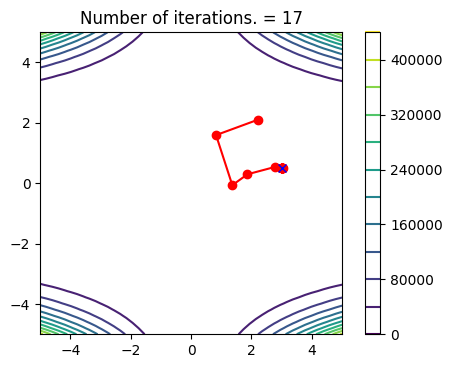

In [4]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

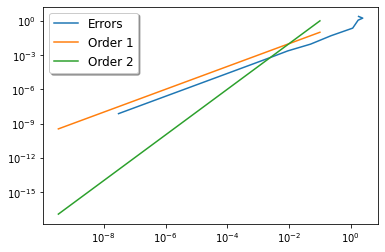

In [5]:
Niter = len(pp)
dis = np.linspace(1,Niter,Niter+1)

errors=[np.sqrt((X[0]-analytic[0])**2+(X[1]-analytic[1])**2) for X in pp]
#print(errors)

if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2
lam = 0.5*(1+np.sqrt(5))
sq2 = 100*sq**2
sq3 = 100*sq**3
sqlam = 100*sq**lam

plt.figure()
#fig, ax = plt.subplots()

plt.loglog(errors[:-1:],errors[1:],label='Errors')
plt.loglog(sq,sq,label='Order 1')

plt.loglog(sq,sq2,label='Order 2')
#plt.loglog(sq,sq3,label='Order 3')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 2**

Implement the triangulation problem shown in the course. As inputs you are give: 

- the coordinates $\left(x_{i}, y_{i}\right), i=1,2,3$ of three antennas

- the distances $d_{i}, i=1,2,3$ of a cellphone to the corresponding antenna

Test your algorithm in various cases and compare the convergence speed with the one given by the gradient descent algorithm.
</div>

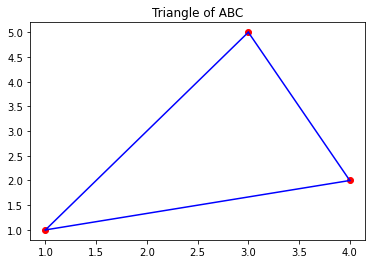

In [6]:
# Coordinates of antennas
A = np.array([1, 1])
B = np.array([4, 2])
C = np.array([3, 5])

# Initial guess for cellphone coordinates
x_initial = np.array([2.5, 2.5])

# Distances from cellphone to antennas
dA = np.linalg.norm(x_initial - A)
dB = np.linalg.norm(x_initial - B)
dC = np.linalg.norm(x_initial - C)

# Plot the triangle of ABC
plt.figure()
plt.plot(A[0], A[1], 'ro')
plt.plot(B[0], B[1], 'ro')
plt.plot(C[0], C[1], 'ro')
plt.plot([A[0], B[0]], [A[1], B[1]], 'b')
plt.plot([A[0], C[0]], [A[1], C[1]], 'b')
plt.plot([C[0], B[0]], [C[1], B[1]], 'b')
plt.title('Triangle of ABC')
plt.show()

Initial value: 5.6319929821341885


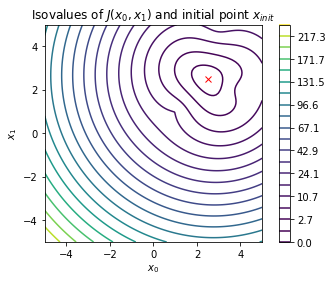

[2.18182378 0.73605835]


In [7]:
variant = 3
analytic = [2.5, 2.5]
x0 = np.array([5.0, 3.0])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 5e-16
Maxiter = 20000


print("Initial value:", J(x0))

plt.figure()
xmin = min(-4, analytic[0]) - 1
xmax = max(4, analytic[0]) + 1
ymin = min(-4, analytic[1]) - 1
ymax = max(4, analytic[1]) + 1
aX0 = np.linspace(xmin, xmax, 100)
aX1 = np.linspace(ymin, ymax, 100)
Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])

contours = np.linspace(0, Z.max()**(1 / 2), 20)**2
plt.contour(aX0, aX1, Z, levels=contours)  #(np.linspace(0,30,10)**2))
plt.plot(analytic[0], analytic[1], 'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [8]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=1)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))

[2.18182378 0.73605835]
t:  1
d:  [-1.1618826  -0.22608776]
t:  1
d:  [-1.29498257 -0.066331  ]
t:  1
d:  [-0.05246872 -0.20133587]
t:  1
d:  [ 0.00934377 -0.00624755]
t:  1
d:  [-9.88059100e-06  2.17801685e-06]
t:  1
d:  [-7.25217475e-12  6.59233272e-12]
Function does not decrease enough!

Final output:
Iter:  6 | Val:  0.0 | Step:  1  Grad:  0.0
Number of iterations:  7
Final position:  [2.5 2.5]
Difference to analytical sol:  0.0


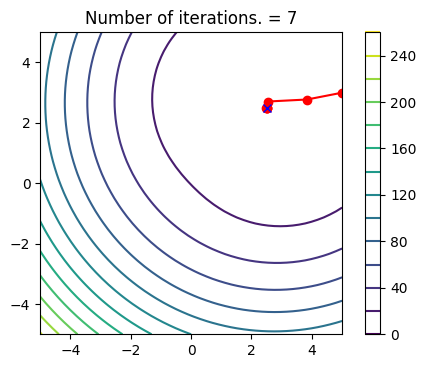

In [9]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px;width:95%">

**Question 3**

**(Challenge: Population model)** Take a look at the data regarding the population given in the .csv file on Moodle (source *worldometers.info*). Consider the following models:

- **exponential model:** $P(t)=c \exp (d t)$, assuming that the growth rate of the population is proportional with the population size.

- **logistic model:** $P(t)=\frac{K}{1+c e^{-d t}}$, assuming that the growth ratio is influenced not only by the population size, but also by the fact that the Earth is finite in space and ressources, so infinite growth cannot occur.

Try to find in each case the parameters which best fit your data using the Gauss-Newton algorithm. For example, in the first case write
$$
F(c, d)=\sum_{i=1}^{N}\left[P_{i}-c \exp \left(d t_{i}\right)\right]^{2},
$$
where $P_{i}$ is the population observed at the moment $t_{i}$. The non-linear least squares functions $r_{i}$ are given by
$$
r_{i}(t)=P_{i}-c \exp \left(d t_{i}\right)
$$
Use these to find the Jacobian matrix (derivatives w.r.t. $c$ and $d$ ) and to find parameters which minimize $F$. For the exponential model consider the initialization $(c, d)=(3,2)$. For the logistic model you have a function depending on $K, c$ and $d$ and consider the initialization $(K, c, d)=(12,3,3)$.
Once you found the optimal parameters plot the functions obtained against the data points to verify your results. What is the predicted population of the Earth in 2050 and 2100 for the two models? Which of the two models is more realistic? Which of the two models best fits the data? What is the interpretation of $K$ in the logistic model?

</div>

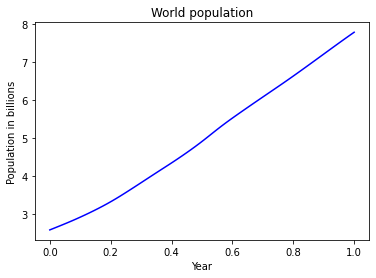

,Year,Population,Urban
0,2020.0,7.794799e+09,4.378994e+09
1,2019.0,7.713468e+09,4.299439e+09
2,2018.0,7.631091e+09,4.219817e+09
3,2017.0,7.547859e+09,4.140189e+09
4,2016.0,7.464022e+09,4.060653e+09
...,...,...,...
65,1955.0,2.773020e+09,8.770088e+08
66,1954.0,2.724847e+09,8.501791e+08
67,1953.0,2.677609e+09,8.242900e+08
68,1952.0,2.630862e+09,7.992825e+08


In [10]:
# plot the data
plt.figure()
plt.plot(T, Pop, 'b')
plt.xlabel('Year')
plt.ylabel('Population in billions')
plt.title('World population')
plt.show()

# use pandas to show the data
df = pd.DataFrame(data)
df

Initial value: 1064.0402005786225


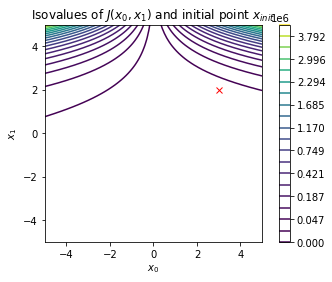

[1028.53127878 1933.00604239]


In [11]:
x0 = np.array([2.2, 2.1])
mult = 1
m1 = 0.1
m2 = 0.9
Tol = 5e-16
Maxiter = 20000
variant = 4

if variant == 4:
    analytic = [3, 2]

print("Initial value:", J(x0))

plt.figure()
xmin = min(-4, analytic[0]) - 1
xmax = max(4, analytic[0]) + 1
ymin = min(-4, analytic[1]) - 1
ymax = max(4, analytic[1]) + 1
aX0 = np.linspace(xmin, xmax, 100)
aX1 = np.linspace(ymin, ymax, 100)
Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])

contours = np.linspace(0, Z.max()**(1 / 2), 20)**2
plt.contour(aX0, aX1, Z, levels=contours)  #(np.linspace(0,30,10)**2))
plt.plot(analytic[0], analytic[1], 'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [12]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2,GN=1)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))

[1028.53127878 1933.00604239]
t:  1
d:  [ 0.30206679 -0.71112476]
t:  1
d:  [ 0.2728537  -0.30394991]
t:  1
d:  [ 0.01936941 -0.014976  ]
t:  1
d:  [-0.00075976  0.00042277]
t:  1
d:  [ 2.37106999e-05 -1.26116257e-05]
t:  1
d:  [-7.05415536e-07  3.76607240e-07]
t:  1
d:  [ 2.10667521e-08 -1.12457259e-08]
t:  1
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.5
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.25
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.125
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.0625
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.03125
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.015625
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.0078125
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.00390625
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.005859375
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.0048828125
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.00537109375
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.005615234375
d:  [-6.29064746e-10  3.35804907e-10]
t:  0.0054931640625
d:  [-6.2906

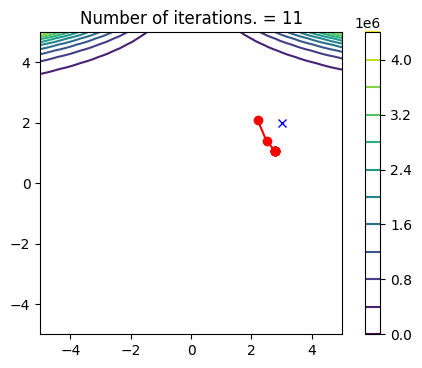

In [13]:
plt.figure(dpi=100)
#print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()